In [2]:
#Import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
#Load the data headers
df = pd.read_csv(
    "twitter_training.csv",
    header=None,
    names=["id", "topic", "sentiment", "text"]
)

In [7]:
#Head of Data
df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [8]:
#Tail of Data
df.tail()

,id,topic,sentiment,text
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [9]:
#Info of the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74682 non-null  int64 
 1   topic      74682 non-null  object
 2   sentiment  74682 non-null  object
 3   text       73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


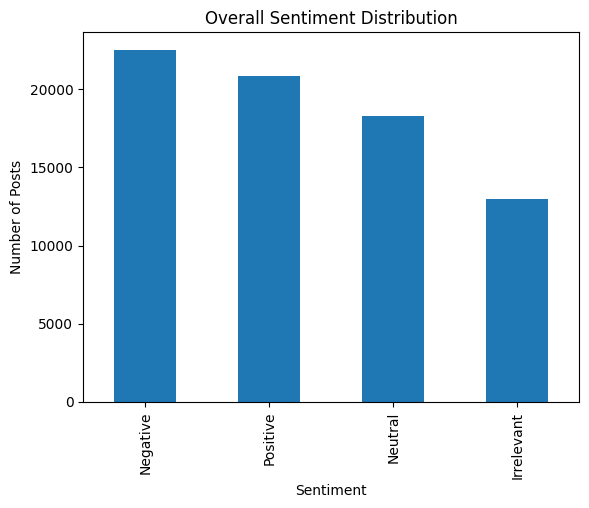

In [15]:
#label based Sentiment distribution 
sentiment_counts = df["sentiment"].value_counts()
plt.figure()
sentiment_counts.plot(kind="bar")
plt.title("Sentiment Distribution (Labels)")
plt.xlabel("Sentiment")
plt.ylabel("Number of Posts")
plt.show()

In [21]:
#Detecting aggressive and negative language in text
violent_words = ["kill", "murder", "die", "attack"]
df["contains_violence"] = df["text"].str.contains("|".join(violent_words),case=False,na=False)

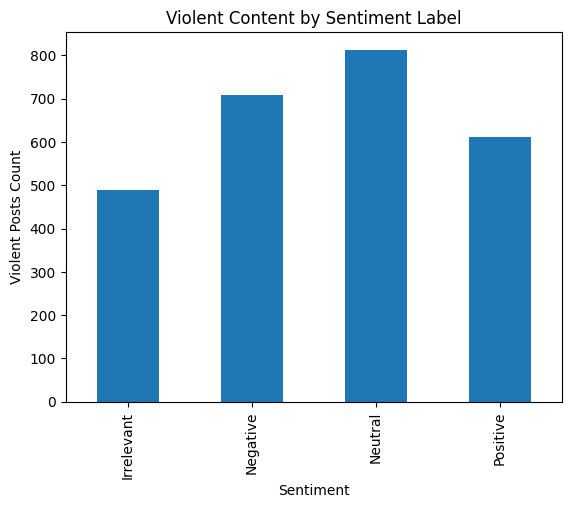

In [12]:
#labeled sentiment vs actual text behavior
comparison = df.groupby("sentiment")["contains_violence"].sum()
plt.figure()
comparison.plot(kind="bar")
plt.title("Violent Content by Sentiment Label")
plt.xlabel("Sentiment")
plt.ylabel("Violent Posts Count")
plt.show()

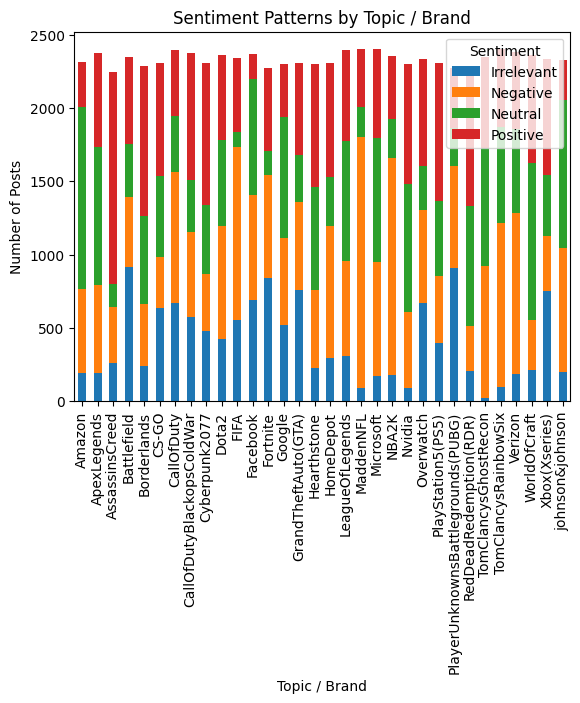

In [20]:
#Brand-wise sentiment analysis
topic_sentiment = df.groupby(["topic", "sentiment"]).size().unstack(fill_value=0)
topic_sentiment.plot(kind="bar", stacked=True)
plt.title("Sentiment Patterns by Topic / Brand")
plt.xlabel("Topic / Brand")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.show()

In [14]:
#Key insights
print("Total posts:", len(df))
print("Posts containing violent language:", df["contains_violence"].sum())

Total posts: 74682
Posts containing violent language: 2620
